# Predicting Hotel Cancellations 

# Imports

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter("ignore")


pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 200)

In [44]:
# data comes from https://www.sciencedirect.com/science/article/pii/S2352340918315191#t0005
# data cleaned by Thomas Mock and Antoine Bichat https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-11/readme.md
df = pd.read_csv("hotel_bookings.csv")

# Data Cleaning and prelimanary EDA

In [45]:
df.shape

(119390, 32)

In [46]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [48]:
df_col=df.columns.to_list()

In [49]:
df.isnull().sum()
# Will leave null values for now and drop/replace towards the end

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [50]:
df.drop(columns = ["agent","company"], inplace = True)

In [51]:
df.country.unique()
# null values under nan

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

# Feature engineering and more EDA

In [52]:
df['children'] =  df['children'].fillna(0)
df["total_guests"] = df["adults"]+df["children"]+df["babies"]
df["total_nights"] = df["stays_in_weekend_nights"]+df["stays_in_week_nights"]


In [53]:
contineous = [
    "lead_time",
    #"stays_in_weekend_nights",# drop
    #"stays_in_week_nights",# drop
    #"adults",# drop
    #"children",# drop
    #"babies",# drop
    "booking_changes",
    "days_in_waiting_list",
    "adr",
    "total_of_special_requests",
    "total_guests",
    "total_nights"
    
]

In [54]:
winter = ["December", "January", "February"] 
spring = ["March", "April", "May"] 
summer = ["June", "July", "August" ]
fall = ["September", "October", "November"]
season = []

for month in df["arrival_date_month"]:
    if month in winter:
        season.append("winter")
    if month in spring:
        season.append("spring")
    if month in summer:
        season.append("summer")
    if month in fall:
        season.append("fall")
                

In [55]:
categorical = [
    "hotel", 
    "is_canceled", # Target
    "meal", 
    "market_segment",
    "previous_cancellations",
    "previous_bookings_not_canceled",
    "distribution_channel",
    "is_repeated_guest",
    "reserved_room_type",
    "assigned_room_type",
    "deposit_type",
    "customer_type",
    #"reservation_status" # drop
]

In [56]:
df["meal"].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [57]:
# Resort Hotel = 1
# City Hotel = 0
resort = []
for ho in df['hotel']:
    if ho == "Resort Hotel":
        resort.append(1)
    else:
        resort.append(0)
        

In [58]:
# binning booking changes

# changes = []

# for x in df["booking_changes"]:
#     if x <= 3:
#         changes.append(0)
#     if x <= 9:
#         changes.append(1)
#     if x >= 10:
#         changes.append(2)

In [59]:
df["resort"] = resort
df["visting_season"] = season
#df["reservation_changes"] = changes

In [60]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests,total_nights,resort,visting_season
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0,1,summer
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0,1,summer
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,1,1,summer
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,1,1,summer
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2.0,2,1,summer


In [61]:
df.groupby("arrival_date_year").mean()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_guests,total_nights,resort
arrival_date_year,,,,,,,,,,,,,,,,,,,,
2015,0.370158,97.245999,39.618976,15.656483,0.929714,2.461266,1.830424,0.061693,0.010138,0.029142,0.336425,0.031915,0.177669,2.279778,87.178515,0.061466,0.435443,1.902255,3.390980,0.377978
2016,0.358633,102.870369,28.458162,15.911104,0.893981,2.442802,1.850988,0.104185,0.008165,0.031354,0.044404,0.153526,0.224840,3.833865,98.325863,0.068334,0.548645,1.963338,3.336784,0.327420
2017,0.386979,109.259223,18.630373,15.717576,0.973308,2.601543,1.877995,0.126281,0.006464,0.034188,0.011871,0.171062,0.239438,0.235186,114.637950,0.054981,0.676506,2.010741,3.574852,0.323912


In [62]:
df.groupby("hotel")[contineous].mean()

,lead_time,booking_changes,days_in_waiting_list,adr,total_of_special_requests,total_guests,total_nights
hotel,,,,,,,
City Hotel,109.735724,0.187369,3.226774,105.304465,0.546918,1.947283,2.978142
Resort Hotel,92.675686,0.287968,0.527758,94.952930,0.619770,2.009735,4.318547


In [63]:
df.groupby("hotel")[categorical].count()

,hotel,is_canceled,meal,market_segment,previous_cancellations,previous_bookings_not_canceled,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,customer_type
hotel,,,,,,,,,,,,
City Hotel,79330,79330,79330,79330,79330,79330,79330,79330,79330,79330,79330,79330
Resort Hotel,40060,40060,40060,40060,40060,40060,40060,40060,40060,40060,40060,40060


In [64]:
df.groupby(["country", "is_canceled"])["total_guests", "total_nights", "adr"].describe()#.sort_values(by="total_guests", ascending = False)

total_guests                                            \
                           count      mean       std  min   25%  50%   75%   
country is_canceled                                                          
ABW     0                    2.0  2.500000  0.707107  2.0  2.25  2.5  2.75   
AGO     0                  157.0  1.808917  0.769063  1.0  1.00  2.0  2.00   
        1                  205.0  1.795122  0.953310  1.0  1.00  2.0  2.00   
AIA     0                    1.0  4.000000       NaN  4.0  4.00  4.0  4.00   
ALB     0                   10.0  1.800000  0.632456  1.0  1.25  2.0  2.00   
...                          ...       ...       ...  ...   ...  ...   ...   
ZAF     1                   31.0  2.000000  0.930949  1.0  1.00  2.0  2.00   
ZMB     0                    1.0  4.000000       NaN  4.0  4.00  4.0  4.00   
        1                    1.0  2.000000       NaN  2.0  2.00  2.0  2.00   
ZWE     0                    2.0  2.000000  0.000000  2.0  2.00  2.0  2.00   
        1                    2.0  2.000000  0.000000  2.0  2.00  2.0  2.00   

                         total_nights                                        \
                     max        count       mean       std  min   25%   50%   
country is_canceled                                                           
ABW     0            3.0          2.0   3.500000  0.707107  3.0  3.25   3.5   
AGO     0            4.0        157.0   3.961783  3.708765  0.0  1.00   3.0   
        1            4.0        205.0  11.297561  7.833703  1.0  5.00  10.0   
AIA     0            4.0          1.0   4.000000       NaN  4.0  4.00   4.0   
ALB     0            3.0         10.0   3.200000  1.032796  2.0  2.25   3.0   
...                  ...          ...        ...       ...  ...   ...   ...   
ZAF     1            4.0         31.0   3.225806  3.293526  1.0  1.00   2.0   
ZMB     0            4.0          1.0   6.000000       NaN  6.0  6.00   6.0   
        1            2.0          1.0   2.000000       NaN  2.0  2.00   2.0   
ZWE     0            2.0          2.0   2.500000  0.707107  2.0  2.25   2.5   
        1            2.0          2.0   2.500000  2.121320  1.0  1.75   2.5   

                                    adr                                 \
                       75%   max  count        mean        std     min   
country is_canceled                                                      
ABW     0             3.75   4.0    2.0  128.340000  41.493026   99.00   
AGO     0             5.00  18.0  157.0  112.056624  48.375907    0.00   
        1            15.00  30.0  205.0  121.002976  53.101368    0.50   
AIA     0             4.00   4.0    1.0  265.000000        NaN  265.00   
ALB     0             4.00   5.0   10.0   79.024000  22.422877   35.15   
...                    ...   ...    ...         ...        ...     ...   
ZAF     1             4.00  15.0   31.0  114.658710  46.988325   55.83   
ZMB     0             6.00   6.0    1.0   96.670000        NaN   96.67   
        1             2.00   2.0    1.0  107.100000        NaN  107.10   
ZWE     0             2.75   3.0    2.0   45.965000  28.093352   26.10   
        1             3.25   4.0    2.0  124.650000   1.909188  123.30   

                                                          
                          25%      50%       75%     max  
country is_canceled                                       
ABW     0            113.6700  128.340  143.0100  157.68  
AGO     0             88.0000  105.000  135.0000  305.00  
        1             79.0000  101.980  152.0000  290.56  
AIA     0            265.0000  265.000  265.0000  265.00  
ALB     0             68.1675   77.100   89.3250  114.30  
...                       ...      ...       ...     ...  
ZAF     1             79.0000  103.500  147.0500  225.67  
ZMB     0             96.6700   96.670   96.6700   96.67  
        1            107.1000  107.100  107.1000  107.10  
ZWE     0             36.0325   45.965   55.8975   65.83  
        1       

In [65]:
df.groupby(["country", "is_canceled"])["total_guests", "total_nights", "adr"].count()

total_guests  total_nights  adr
country is_canceled                                 
ABW     0                       2             2    2
AGO     0                     157           157  157
        1                     205           205  205
AIA     0                       1             1    1
ALB     0                      10            10   10
...                           ...           ...  ...
ZAF     1                      31            31   31
ZMB     0                       1             1    1
        1                       1             1    1
ZWE     0                       2             2    2
        1                       2             2    2

[292 rows x 3 columns]

Text(0, 0.5, 'Count')

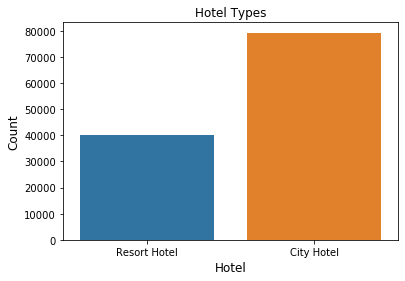

In [66]:
sns.countplot(x='hotel', data = df)
plt.title('Hotel Types')
plt.xlabel('Hotel', fontsize=12)
plt.ylabel('Count', fontsize=12)

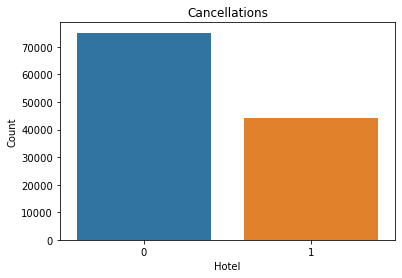

In [67]:
sns.countplot(x='is_canceled', data = df)
plt.title('Cancellations')
plt.xlabel('Hotel')
plt.ylabel('Count');

# 0 - Not canceled
# 1 - Canceled 

In [68]:
def boxplot(feature1, feature2, feature3, width=16):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width,6))
    s = sns.boxplot(ax = ax1, x=feature1, y=feature2, hue=feature3,
                data=df)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show();

In [69]:
def violinplot(feature1, feature2, feature3, width=16):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width,6))
    s = sns.violinplot(ax = ax1, x=feature1, y=feature2, hue=feature3,
                data=df, split = True)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show();

In [70]:
def scatterplot(feature1, feature2, feature3, width=16):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width,6))
    s = sns.scatterplot(ax = ax1, x=feature1, y=feature2, hue=feature3,
                data=df, alpha = 0.5)
    s.set_xticklabels(s.get_xticklabels())
    plt.show();

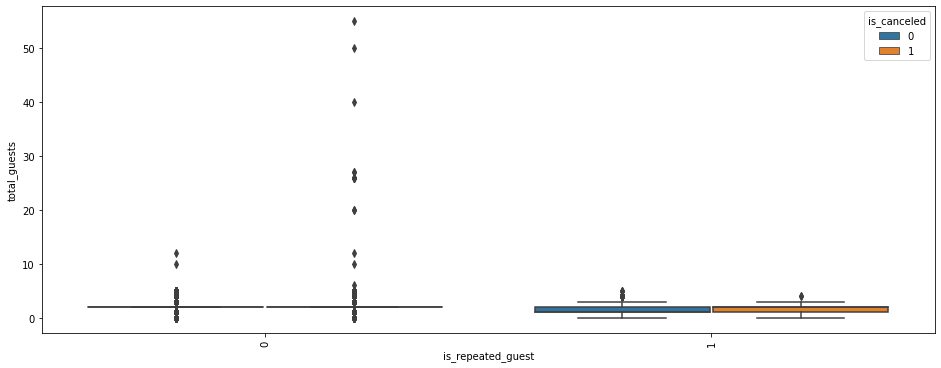

In [71]:
boxplot("is_repeated_guest", "total_guests", "is_canceled")

In [72]:
df[df["total_guests"]>10]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests,total_nights,resort,visting_season
328,Resort Hotel,1,55,2015,July,29,12,4,10,2,10.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,2,No Deposit,0,Contract,133.16,0,1,No-Show,2015-07-12,12.0,14,1,summer
1539,Resort Hotel,1,304,2015,September,36,3,0,3,40,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,0,Group,0.00,0,0,Canceled,2015-01-02,40.0,3,1,fall
1587,Resort Hotel,1,333,2015,September,36,5,2,5,26,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Group,0.00,0,0,Canceled,2015-01-02,26.0,7,1,fall
1643,Resort Hotel,1,336,2015,September,37,7,1,2,50,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,0,Group,0.00,0,0,Canceled,2015-01-18,50.0,3,1,fall
1752,Resort Hotel,1,340,2015,September,37,12,2,5,26,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Group,0.00,0,0,Canceled,2015-01-02,26.0,7,1,fall
1884,Resort Hotel,1,347,2015,September,38,19,2,5,26,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Group,0.00,0,0,Canceled,2015-01-02,26.0,7,1,fall
1917,Resort Hotel,1,349,2015,September,39,21,1,3,27,0.0,0,HB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,0,Group,0.00,0,0,Canceled,2015-01-02,27.0,4,1,fall
1962,Resort Hotel,1,352,2015,September,39,24,1,3,27,0.0,0,HB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,0,Group,0.00,0,0,Canceled,2015-01-02,27.0,4,1,fall
2003,Resort Hotel,1,354,2015,September,39,26,2,5,26,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Group,0.00,0,0,Canceled,2015-01-02,26.0,7,1,fall
2164,Resort Hotel,1,361,2015,October,40,3,2,5,26,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Group,0.00,0,0,Canceled,2015-01-02,26.0,7,1,fall


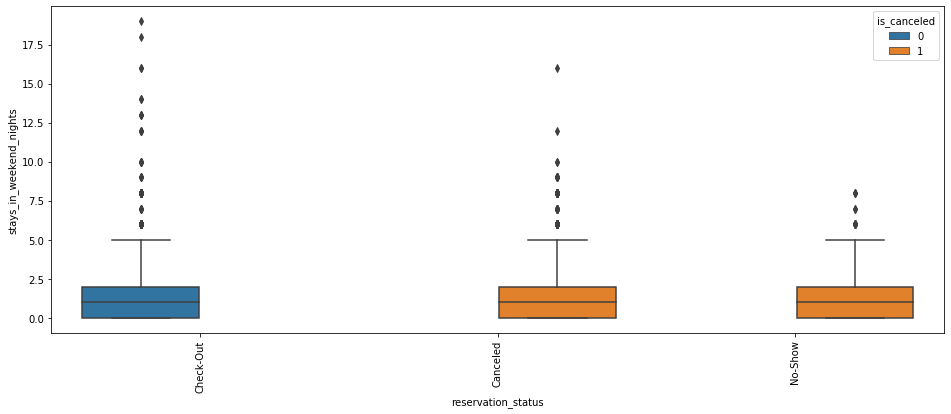

In [73]:
boxplot("reservation_status", "stays_in_weekend_nights", "is_canceled")

In [74]:
df[df["stays_in_weekend_nights"]>5]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests,total_nights,resort,visting_season
87,Resort Hotel,1,79,2015,July,27,3,6,15,2,1.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,108.73,0,2,Canceled,2015-04-15,3.0,21,1,summer
1149,Resort Hotel,1,47,2015,August,33,15,6,12,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,181.94,0,0,Canceled,2015-07-06,2.0,18,1,summer
1655,Resort Hotel,0,30,2015,September,37,7,13,33,2,0.0,0,SC,ESP,Online TA,TA/TO,0,0,0,A,I,17,No Deposit,0,Transient,0.00,0,1,Check-Out,2015-10-23,2.0,46,1,fall
1754,Resort Hotel,0,170,2015,September,37,12,6,12,2,0.0,0,HB,SWE,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Contract,72.25,0,0,Check-Out,2015-09-30,2.0,18,1,fall
1790,Resort Hotel,0,135,2015,September,38,14,8,20,2,0.0,0,HB,GBR,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,0,Contract,82.00,0,0,Check-Out,2015-10-12,2.0,28,1,fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103282,City Hotel,0,3,2016,November,47,14,9,25,2,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,A,A,3,No Deposit,0,Transient,93.00,0,0,Check-Out,2016-12-18,2.0,34,0,fall
105050,City Hotel,0,82,2017,January,1,7,6,16,2,0.0,0,SC,BRA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,74.80,0,4,Check-Out,2017-01-29,2.0,22,0,winter
106335,City Hotel,0,30,2017,February,5,2,6,16,2,0.0,0,BB,CN,Online TA,TA/TO,0,0,0,E,E,1,No Deposit,0,Transient,115.60,0,3,Check-Out,2017-02-24,2.0,22,0,winter
106561,City Hotel,0,11,2017,January,3,15,13,30,0,0.0,0,SC,USA,Online TA,TA/TO,0,0,0,A,K,14,No Deposit,0,Transient,0.00,0,0,Check-Out,2017-02-27,0.0,43,0,winter


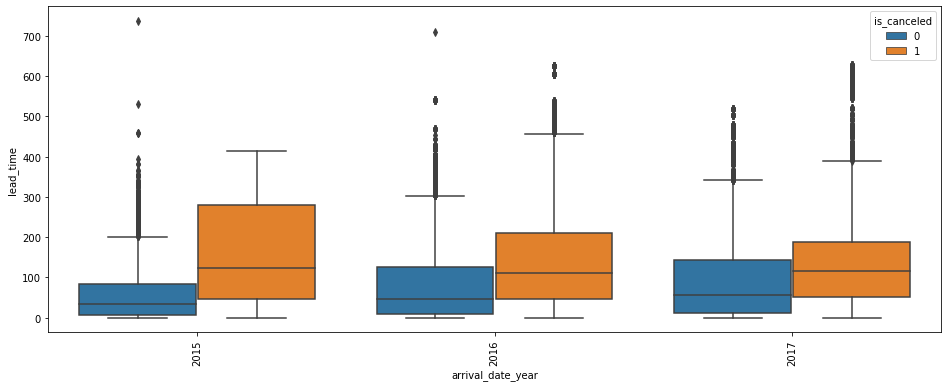

In [75]:
boxplot("arrival_date_year", "lead_time", "is_canceled")

In [76]:
df[df["lead_time"]>700] #outlier much? Who books 2 years in advcance? 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests,total_nights,resort,visting_season
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0,1,summer
4182,Resort Hotel,0,709,2016,February,9,25,8,20,2,0.0,0,HB,GBR,Direct,Direct,0,0,0,E,E,2,No Deposit,0,Transient,68.0,0,0,Check-Out,2016-03-24,2.0,28,1,winter


In [77]:
df[df["lead_time"]>500] #dammn people really plan ahead... 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests,total_nights,resort,visting_season
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,2.0,0,1,summer
4182,Resort Hotel,0,709,2016,February,9,25,8,20,2,0.0,0,HB,GBR,Direct,Direct,0,0,0,E,E,2,No Deposit,0,Transient,68.00,0,0,Check-Out,2016-03-24,2.0,28,1,winter
8395,Resort Hotel,0,542,2016,September,40,26,2,5,2,0.0,0,HB,GBR,Groups,TA/TO,0,0,0,A,A,1,No Deposit,0,Transient-Party,69.71,0,0,Check-Out,2016-10-03,2.0,7,1,fall
8397,Resort Hotel,0,542,2016,September,40,26,2,5,2,0.0,0,HB,GBR,Groups,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient-Party,87.00,0,3,Check-Out,2016-10-03,2.0,7,1,fall
8399,Resort Hotel,0,542,2016,September,40,26,2,5,2,0.0,0,HB,GBR,Groups,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient-Party,87.00,0,2,Check-Out,2016-10-03,2.0,7,1,fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119100,City Hotel,0,518,2017,August,34,26,2,1,2,0.0,0,BB,AUS,Groups,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient-Party,112.67,0,1,Check-Out,2017-08-29,2.0,3,0,summer
119102,City Hotel,0,518,2017,August,34,26,2,1,1,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,2017-08-29,1.0,3,0,summer
119107,City Hotel,0,518,2017,August,34,26,2,1,2,0.0,0,BB,AUS,Groups,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient-Party,112.67,0,1,Check-Out,2017-08-29,2.0,3,0,summer
119109,City Hotel,0,518,2017,August,34,26,2,1,2,0.0,0,BB,GBR,Groups,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient-Party,112.67,0,1,Check-Out,2017-08-29,2.0,3,0,summer


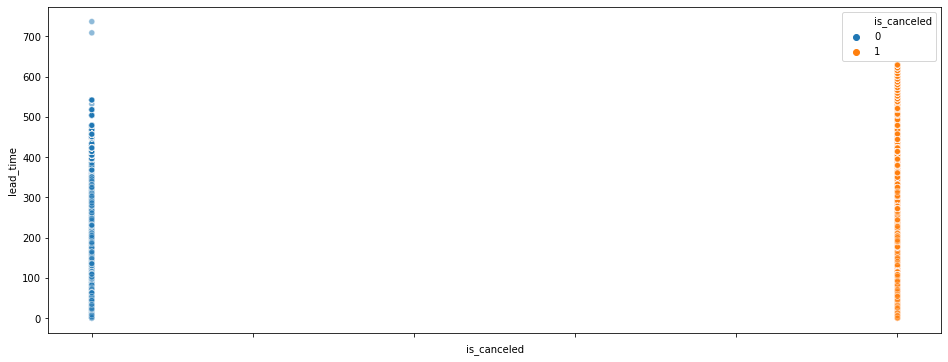

In [78]:
scatterplot("is_canceled", "lead_time", "is_canceled")

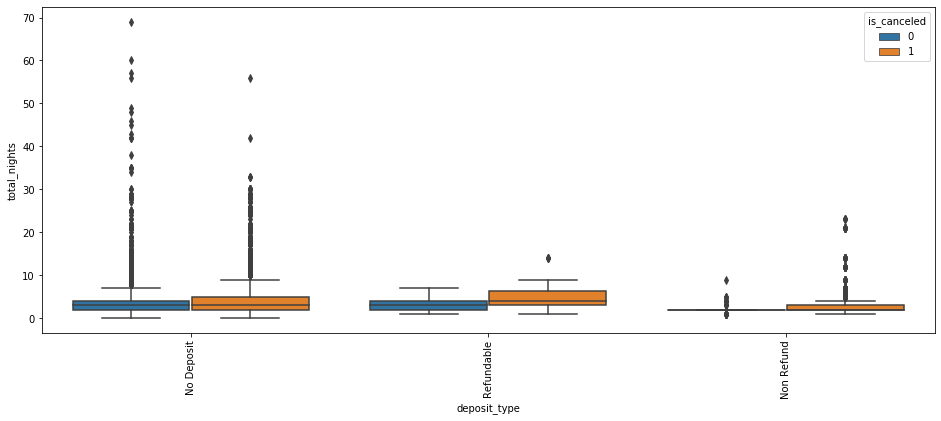

In [79]:
boxplot("deposit_type", "total_nights", "is_canceled")

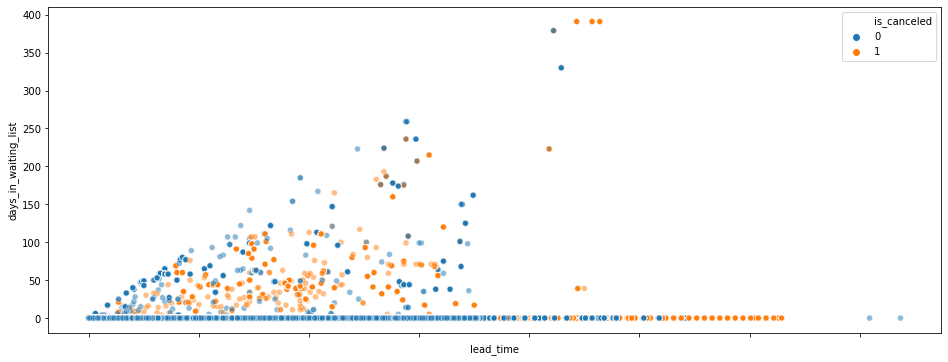

In [80]:
#
scatterplot("lead_time", "days_in_waiting_list", "is_canceled")

In [81]:
df["didnt_wait"] = np.where(df["days_in_waiting_list"]<1,1,0)

In [82]:
df["days_in_waiting_list"].value_counts()
# make dummies of 0 waiting days 

0      115692
39        227
58        164
44        141
31        127
35         96
46         94
69         89
63         83
50         80
87         80
38         76
111        71
45         65
101        65
77         63
41         63
223        61
62         60
3          59
98         59
22         56
122        55
15         54
48         52
176        50
91         50
28         50
17         47
96         46
187        45
56         45
391        45
68         42
60         41
75         40
93         40
21         37
236        35
65         35
147        30
33         30
19         30
162        30
178        30
42         30
20         29
10         28
40         28
27         26
34         26
120        25
4          25
57         25
160        25
25         25
80         24
47         24
215        21
79         20
108        20
24         19
99         19
32         19
43         19
174        19
70         18
61         18
49         18
9          16
125        16
6     

In [83]:
categorical

['hotel',
 'is_canceled',
 'meal',
 'market_segment',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'distribution_channel',
 'is_repeated_guest',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type']

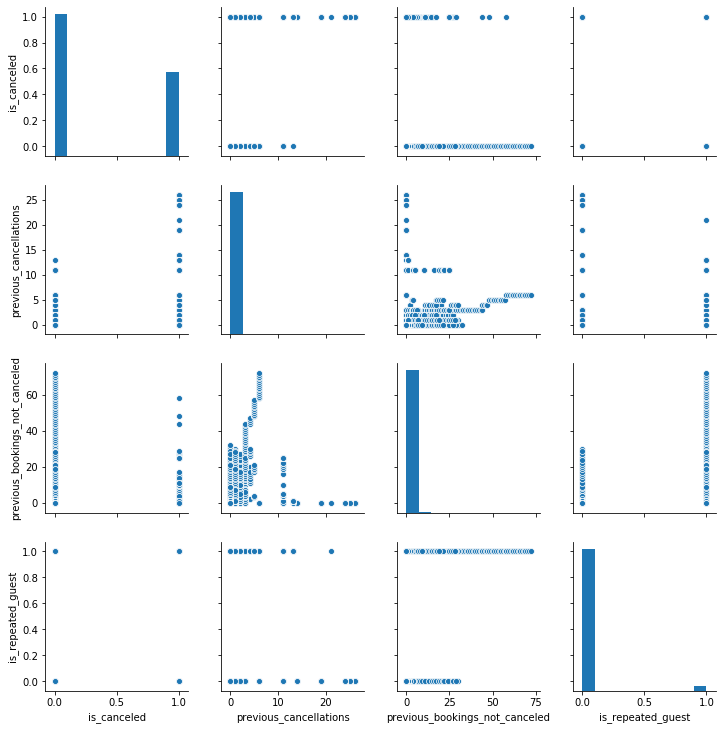

In [84]:
sns.pairplot(df[categorical]);

In [85]:
contineous

['lead_time',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'total_of_special_requests',
 'total_guests',
 'total_nights']

In [86]:
df[contineous].max()

lead_time                     737.0
booking_changes                21.0
days_in_waiting_list          391.0
adr                          5400.0
total_of_special_requests       5.0
total_guests                   55.0
total_nights                   69.0
dtype: float64

In [87]:
df[df["adr"]>400]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests,total_nights,resort,visting_season,didnt_wait
13142,Resort Hotel,1,378,2017,August,31,1,4,10,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,450.00,0,0,Canceled,2016-07-22,2.0,14,1,summer,1
13391,Resort Hotel,1,59,2017,August,33,13,2,4,2,2.0,0,FB,PRT,Direct,Direct,0,0,0,H,H,1,No Deposit,0,Transient,437.00,0,0,Canceled,2017-08-03,4.0,6,1,summer,1
15083,Resort Hotel,0,1,2015,July,29,15,0,1,2,0.0,0,BB,PRT,Corporate,Corporate,1,0,1,A,C,0,No Deposit,0,Transient,508.00,1,0,Check-Out,2015-07-16,2.0,1,1,summer,1
39155,Resort Hotel,0,31,2017,August,31,1,2,6,2,2.0,0,Undefined,PRT,Direct,Direct,0,0,0,G,G,0,No Deposit,0,Transient,426.25,0,2,Check-Out,2017-08-09,4.0,8,1,summer,1
39568,Resort Hotel,0,104,2017,August,33,17,2,3,3,1.0,0,HB,ESP,Online TA,TA/TO,0,0,0,H,H,2,No Deposit,0,Transient,402.00,0,1,Check-Out,2017-08-22,4.0,5,1,summer,1
48515,City Hotel,1,35,2016,March,13,25,0,1,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,1,Non Refund,0,Transient,5400.00,0,0,Canceled,2016-02-19,2.0,1,0,spring,1
103912,City Hotel,0,81,2016,December,53,31,1,1,2,2.0,0,BB,PRT,Direct,Direct,0,0,0,E,E,1,No Deposit,0,Transient-Party,451.50,0,4,Check-Out,2017-01-02,4.0,2,0,winter,1
111403,City Hotel,0,0,2017,May,19,9,0,1,1,0.0,0,BB,ITA,Offline TA/TO,TA/TO,0,0,0,A,G,0,No Deposit,0,Transient,510.00,0,0,Check-Out,2017-05-10,1.0,1,0,spring,1


In [88]:
df["reservation_status"].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [89]:
sum((df["reservation_status"]=="Canceled"))

43017

In [90]:
df[df["reservation_status"]=="check_out"]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests,total_nights,resort,visting_season,didnt_wait


In [91]:
categorical


['hotel',
 'is_canceled',
 'meal',
 'market_segment',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'distribution_channel',
 'is_repeated_guest',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type']

In [92]:
df[(df.total_nights == 0) & (df.is_canceled == 0)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests,total_nights,resort,visting_season,didnt_wait
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0,1,summer,1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0,1,summer,1
167,Resort Hotel,0,111,2015,July,28,6,0,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,H,0,No Deposit,0,Transient,0.0,0,2,Check-Out,2015-07-06,2.0,0,1,summer,1
168,Resort Hotel,0,0,2015,July,28,6,0,0,1,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,H,0,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-06,1.0,0,1,summer,1
196,Resort Hotel,0,8,2015,July,28,7,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,0,Transient,0.0,0,1,Check-Out,2015-07-07,2.0,0,1,summer,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115483,City Hotel,0,15,2017,July,27,6,0,0,1,0.0,0,SC,FRA,Direct,Direct,0,0,0,A,A,0,No Deposit,0,Transient-Party,0.0,0,0,Check-Out,2017-07-06,1.0,0,0,summer,1
117701,City Hotel,0,0,2017,August,32,8,0,0,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,1,0,0,A,A,0,No Deposit,0,Transient,0.0,0,0,Check-Out,2017-08-08,2.0,0,0,summer,1
118029,City Hotel,0,0,2017,August,33,14,0,0,2,0.0,0,BB,PRT,Direct,Direct,1,0,0,A,A,0,No Deposit,0,Transient,0.0,0,0,Check-Out,2017-08-14,2.0,0,0,summer,1
118631,City Hotel,0,78,2017,August,34,23,0,0,1,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,K,7,No Deposit,0,Transient-Party,0.0,0,0,Check-Out,2017-08-23,1.0,0,0,summer,1


In [93]:
df.arrival_date_month.unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [94]:
df.drop(columns = ["hotel","arrival_date_month","market_segment", "distribution_channel"], inplace = True)

In [95]:
df

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests,total_nights,resort,visting_season,didnt_wait
0,0,342,2015,27,1,0,0,2,0.0,0,BB,PRT,0,0,0,C,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,2.0,0,1,summer,1
1,0,737,2015,27,1,0,0,2,0.0,0,BB,PRT,0,0,0,C,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,2.0,0,1,summer,1
2,0,7,2015,27,1,0,1,1,0.0,0,BB,GBR,0,0,0,A,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,1.0,1,1,summer,1
3,0,13,2015,27,1,0,1,1,0.0,0,BB,GBR,0,0,0,A,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,1.0,1,1,summer,1
4,0,14,2015,27,1,0,2,2,0.0,0,BB,GBR,0,0,0,A,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03,2.0,2,1,summer,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,35,30,2,5,2,0.0,0,BB,BEL,0,0,0,A,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06,2.0,7,0,summer,1
119386,0,102,2017,35,31,2,5,3,0.0,0,BB,FRA,0,0,0,E,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07,3.0,7,0,summer,1
119387,0,34,2017,35,31,2,5,2,0.0,0,BB,DEU,0,0,0,D,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07,2.0,7,0,summer,1
119388,0,109,2017,35,31,2,5,2,0.0,0,BB,GBR,0,0,0,A,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07,2.0,7,0,summer,1


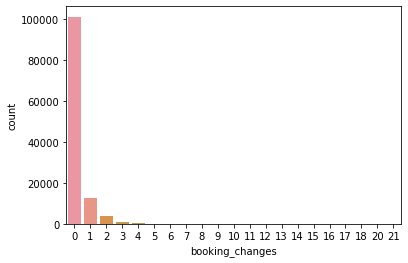

In [96]:
sns.countplot(x="booking_changes", data=df);

In [97]:
sorted(df["booking_changes"].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21]

In [98]:
df[df["booking_changes"]>10]

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests,total_nights,resort,visting_season,didnt_wait
1655,0,30,2015,37,7,13,33,2,0.0,0,SC,ESP,0,0,0,A,I,17,No Deposit,0,Transient,0.00,0,1,Check-Out,2015-10-23,2.0,46,1,fall,1
9106,1,206,2016,44,27,2,5,2,0.0,0,BB,IRL,0,0,0,A,A,16,No Deposit,0,Transient,46.88,0,1,Canceled,2016-07-25,2.0,7,1,fall,1
23784,0,101,2016,18,29,2,3,2,0.0,0,HB,BEL,0,0,0,A,A,13,No Deposit,0,Transient-Party,75.00,0,1,Check-Out,2016-05-04,2.0,5,1,spring,1
23849,0,101,2016,18,29,2,5,2,0.0,0,HB,NLD,0,0,0,A,A,12,No Deposit,0,Transient-Party,75.00,0,0,Check-Out,2016-05-06,2.0,7,1,spring,1
38759,0,149,2017,30,25,8,21,2,0.0,0,SC,FRA,0,0,0,E,I,13,No Deposit,0,Transient,0.00,0,0,Check-Out,2017-08-23,2.0,29,1,summer,1
41020,0,0,2015,33,10,9,20,0,0.0,0,SC,PRT,0,0,0,E,K,20,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-09-08,0.0,29,0,summer,1
51773,0,158,2016,22,25,0,4,2,1.0,0,BB,AUT,0,0,0,A,D,13,No Deposit,0,Transient,114.75,0,1,Check-Out,2016-05-29,3.0,4,0,spring,1
51776,0,158,2016,22,25,0,4,2,0.0,0,BB,AUT,0,0,0,D,D,13,No Deposit,0,Transient,123.25,0,1,Check-Out,2016-05-29,2.0,4,0,spring,1
51853,0,159,2016,22,26,0,3,1,0.0,0,BB,AUT,0,0,0,A,E,13,No Deposit,0,Transient,119.85,0,1,Check-Out,2016-05-29,1.0,3,0,spring,1
51919,1,159,2016,22,26,0,3,1,0.0,0,BB,AUT,0,0,0,F,F,14,No Deposit,0,Transient-Party,187.85,0,0,Canceled,2016-05-16,1.0,3,0,spring,1


In [99]:
df["booking_changes"].value_counts()

0     101314
1      12701
2       3805
3        927
4        376
5        118
6         63
7         31
8         17
9          8
10         6
13         5
14         5
15         3
11         2
12         2
16         2
17         2
20         1
18         1
21         1
Name: booking_changes, dtype: int64

In [100]:
# binning booking changes

changes = []

for x in df["booking_changes"]:
    if x <= 3:
        changes.append(0)
    if x <= 9:
        changes.append(1)
    if x >= 10:
        changes.append(2)


In [101]:
lmk = df["reserved_room_type"] == df["assigned_room_type"] 
# it would be cool if we had data on the rooms itself. 
# Maybe people reserved a room but got an upgrade. 


In [102]:
lmk.value_counts()

True     104473
False     14917
dtype: int64

In [103]:
df["reserved_room_type"].nunique()

10

In [104]:
df["assigned_room_type"].nunique() 
# I and K are not in the reserved room types

12

In [105]:
#sns.pairplot(df[contineous]);

In [106]:
#sns.pairplot(df["adr", "total_guests", "total_nights", "country", ])

In [107]:
corr=df.corr()

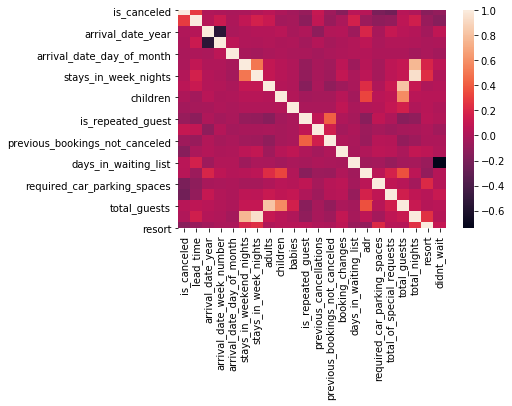

In [108]:
sns.heatmap(data=corr)

In [109]:
df.drop(columns = ["adults", "children","babies", "stays_in_weekend_nights", "stays_in_week_nights", "reservation_status", "reservation_status_date"], inplace = True)

In [110]:
df

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,meal,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_guests,total_nights,resort,visting_season,didnt_wait
0,0,342,2015,27,1,BB,PRT,0,0,0,C,C,3,No Deposit,0,Transient,0.00,0,0,2.0,0,1,summer,1
1,0,737,2015,27,1,BB,PRT,0,0,0,C,C,4,No Deposit,0,Transient,0.00,0,0,2.0,0,1,summer,1
2,0,7,2015,27,1,BB,GBR,0,0,0,A,C,0,No Deposit,0,Transient,75.00,0,0,1.0,1,1,summer,1
3,0,13,2015,27,1,BB,GBR,0,0,0,A,A,0,No Deposit,0,Transient,75.00,0,0,1.0,1,1,summer,1
4,0,14,2015,27,1,BB,GBR,0,0,0,A,A,0,No Deposit,0,Transient,98.00,0,1,2.0,2,1,summer,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,35,30,BB,BEL,0,0,0,A,A,0,No Deposit,0,Transient,96.14,0,0,2.0,7,0,summer,1
119386,0,102,2017,35,31,BB,FRA,0,0,0,E,E,0,No Deposit,0,Transient,225.43,0,2,3.0,7,0,summer,1
119387,0,34,2017,35,31,BB,DEU,0,0,0,D,D,0,No Deposit,0,Transient,157.71,0,4,2.0,7,0,summer,1
119388,0,109,2017,35,31,BB,GBR,0,0,0,A,A,0,No Deposit,0,Transient,104.40,0,0,2.0,7,0,summer,1


In [111]:
# make dummies of the following columns
dummy_group = df[[
    "meal",
    "country",
    "is_repeated_guest",
    "previous_cancellations",
    "previous_bookings_not_canceled",
    "reserved_room_type",
    "assigned_room_type",
    "deposit_type",
    "customer_type",
    "resort",
    "visting_season"
              ]]



In [112]:
df.drop(columns = [
    "meal",
    "country",
    "is_repeated_guest",
    "previous_cancellations",
    "previous_bookings_not_canceled",
    "reserved_room_type",
    "assigned_room_type",
    "deposit_type",
    "customer_type",
    "resort",
    "visting_season"],
    inplace = True
       )

In [113]:
dummy_group

,meal,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,deposit_type,customer_type,resort,visting_season
0,BB,PRT,0,0,0,C,C,No Deposit,Transient,1,summer
1,BB,PRT,0,0,0,C,C,No Deposit,Transient,1,summer
2,BB,GBR,0,0,0,A,C,No Deposit,Transient,1,summer
3,BB,GBR,0,0,0,A,A,No Deposit,Transient,1,summer
4,BB,GBR,0,0,0,A,A,No Deposit,Transient,1,summer
...,...,...,...,...,...,...,...,...,...,...,...
119385,BB,BEL,0,0,0,A,A,No Deposit,Transient,0,summer
119386,BB,FRA,0,0,0,E,E,No Deposit,Transient,0,summer
119387,BB,DEU,0,0,0,D,D,No Deposit,Transient,0,summer
119388,BB,GBR,0,0,0,A,A,No Deposit,Transient,0,summer


In [114]:
dummy_group = pd.get_dummies(dummy_group, drop_first = True)

In [115]:
df=pd.merge(df, dummy_group, left_index = True, right_index = True)

In [116]:
contineous

['lead_time',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'total_of_special_requests',
 'total_guests',
 'total_nights']

In [117]:
df

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_guests,total_nights,didnt_wait,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,resort,meal_FB,meal_HB,meal_SC,meal_Undefined,country_AGO,country_AIA,country_ALB,country_AND,country_ARE,country_ARG,country_ARM,country_ASM,country_ATA,country_ATF,country_AUS,country_AUT,country_AZE,country_BDI,country_BEL,country_BEN,country_BFA,country_BGD,country_BGR,country_BHR,country_BHS,country_BIH,country_BLR,country_BOL,country_BRA,country_BRB,country_BWA,country_CAF,country_CHE,...,country_SYC,country_SYR,country_TGO,country_THA,country_TJK,country_TMP,country_TUN,country_TUR,country_TWN,country_TZA,country_UGA,country_UKR,country_UMI,country_URY,country_USA,country_UZB,country_VEN,country_VGB,country_VNM,country_ZAF,country_ZMB,country_ZWE,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,visting_season_spring,visting_season_summer,visting_season_winter
0,0,342,2015,27,1,3,0,0.00,0,0,2.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0,737,2015,27,1,4,0,0.00,0,0,2.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,0,7,2015,27,1,0,0,75.00,0,0,1.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,0,13,2015,27,1,0,0,75.00,0,0,1.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0,14,2015,27,1,0,0,98.00,0,1,2.0,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,35,30,0,0,96.14,0,0,2.0,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
119386,0,102,2017,35,31,0,0,225.43,0,2,3.0,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
119387,0,34,2017,35,31,0,0,157.71,0,4,2.0,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
119388,0,109,2017,35,31,0,0,104.40,0,0,2.0,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [118]:
df[df["is_canceled"]==1]

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_guests,total_nights,didnt_wait,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,resort,meal_FB,meal_HB,meal_SC,meal_Undefined,country_AGO,country_AIA,country_ALB,country_AND,country_ARE,country_ARG,country_ARM,country_ASM,country_ATA,country_ATF,country_AUS,country_AUT,country_AZE,country_BDI,country_BEL,country_BEN,country_BFA,country_BGD,country_BGR,country_BHR,country_BHS,country_BIH,country_BLR,country_BOL,country_BRA,country_BRB,country_BWA,country_CAF,country_CHE,...,country_SYC,country_SYR,country_TGO,country_THA,country_TJK,country_TMP,country_TUN,country_TUR,country_TWN,country_TZA,country_UGA,country_UKR,country_UMI,country_URY,country_USA,country_UZB,country_VEN,country_VGB,country_VNM,country_ZAF,country_ZMB,country_ZWE,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,visting_season_spring,visting_season_summer,visting_season_winter
8,1,85,2015,27,1,0,0,82.0,0,1,2.0,3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
9,1,75,2015,27,1,0,0,105.5,0,0,2.0,3,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
10,1,23,2015,27,1,0,0,123.0,0,0,2.0,4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
27,1,60,2015,27,1,0,0,107.0,0,2,2.0,7,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
32,1,96,2015,27,1,0,0,108.3,0,2,2.0,10,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110280,1,132,2017,17,25,1,0,0.0,0,3,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
111355,1,4,2017,23,5,0,0,65.0,0,0,1.0,1,1,1,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
111924,1,7,2017,22,31,0,0,65.0,0,0,1.0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
111925,1,6,2017,29,17,0,0,65.0,0,0,1.0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


# Feature Selection

In [119]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [124]:
logmodel = LogisticRegression(penalty = "l1", random_state = 42, solver = "saga", tol = 0.01)
logmodel.fit(X_train, y_train)
y_pred = logmodel.predict(X_test)

print(classification_report(y_test, y_pred.round()))

              precision    recall  f1-score   support

           0       0.68      0.89      0.78     14907
           1       0.64      0.31      0.42      8971

    accuracy                           0.68     23878
   macro avg       0.66      0.60      0.60     23878
weighted avg       0.67      0.68      0.64     23878



### Scaler

In [120]:
scaler = StandardScaler()

In [121]:
X = df.drop(columns = "is_canceled")
y = df["is_canceled"]

In [122]:
X = df.drop(columns = "is_canceled")
y = df["is_canceled"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Model Building

### Logistic Regression with StandardScaler

In [ ]:
logmodel = LogisticRegression(penalty = "l1", random_state = 42, solver = "saga", tol = 0.01)
logmodel.fit(X_train, y_train)
y_pred = logmodel.predict(X_test)

print(classification_report(y_test, y_pred.round()))

In [125]:
print (metrics.confusion_matrix(y_test, y_pred))

[[13331  1576]
 [ 6158  2813]]


### Decision Tree 

In [126]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [127]:
parameters={
    'max_depth': range(1,21,1), 
    'criterion' : ["gini", "entropy"],
    'min_samples_leaf' : range(1,30,3), 
    }

In [128]:
dtc = DecisionTreeClassifier(random_state=42)

#create the instance of GridSearchCV
grid_tree = GridSearchCV(dtc, parameters, cv=5, verbose=1, n_jobs=-1)

#fit the Gridsearch to our data
grid_tree.fit(X_train,y_train)


ypred = grid_tree.predict(X_train)
print("Training Report", classification_report(y_train, ypred))
print('######################')
ypred2 = grid_tree.predict(X_test)
print("Testing Report", classification_report(y_test, ypred2))



# Single best score achieved across all params (min_samples_split)
print(grid_tree.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid_tree.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid_tree.best_estimator_)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  8.3min finished


Training Report               precision    recall  f1-score   support

           0       0.93      0.95      0.94     60259
           1       0.91      0.87      0.89     35253

    accuracy                           0.92     95512
   macro avg       0.92      0.91      0.91     95512
weighted avg       0.92      0.92      0.92     95512

######################
Testing Report               precision    recall  f1-score   support

           0       0.87      0.89      0.88     14907
           1       0.81      0.79      0.80      8971

    accuracy                           0.85     23878
   macro avg       0.84      0.84      0.84     23878
weighted avg       0.85      0.85      0.85     23878

0.8451398631403496
{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1}
DecisionTreeClassifier(max_depth=20, random_state=42)


### Decision Tree 2.0

In [129]:
parameters={
    'max_depth': range(19,31,1), 
    'criterion' : ["gini"],
    'min_samples_leaf' : range(1,10,1), 
    }



dtc = DecisionTreeClassifier(random_state=42)

#create the instance of GridSearchCV
grid_tree = GridSearchCV(dtc, parameters, cv=5, verbose=1, n_jobs=-1)

#fit the Gridsearch to our data
grid_tree.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  3.3min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': range(19, 31),
                         'min_samples_leaf': range(1, 10)},
             verbose=1)

In [130]:
ypred = grid_tree.predict(X_train)
print(classification_report(y_train, ypred))
print('######################')
ypred2 = grid_tree.predict(X_test)
print(classification_report(y_test, ypred2))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     60259
           1       0.91      0.87      0.89     35253

    accuracy                           0.92     95512
   macro avg       0.92      0.91      0.91     95512
weighted avg       0.92      0.92      0.92     95512

######################
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     14907
           1       0.81      0.79      0.80      8971

    accuracy                           0.85     23878
   macro avg       0.84      0.84      0.84     23878
weighted avg       0.85      0.85      0.85     23878



In [131]:
# Single best score achieved across all params (min_samples_split)
print(grid_tree.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid_tree.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid_tree.best_estimator_)

0.8451398631403496
{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1}
DecisionTreeClassifier(max_depth=20, random_state=42)


### Fit a Bagging Classifier for a Logistic Regression model

In [132]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import precision_score

In [133]:
bc_logreg = BaggingClassifier(
            base_estimator=LogisticRegression(random_state = 42, class_weight='balanced'), 
            n_estimators= 500,
            max_samples= 0.8,
            max_features= 6,
            oob_score= True
                )

In [134]:
bc_logreg.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(class_weight='balanced',
                                                    random_state=42),
                  max_features=6, max_samples=0.8, n_estimators=500,
                  oob_score=True)

In [135]:
bc_logreg.oob_score_

0.7511202780802412

In [136]:
bc_logreg_preds = bc_logreg.predict(X_test)

In [137]:
precision_score(y_test, bc_logreg_preds)

0.6868567372530463

# RandomForest Classifier

In [138]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier


In [139]:
X = df.drop(columns = "is_canceled")
y = df["is_canceled"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [140]:
rfc = RandomForestClassifier(random_state = 1, n_estimators=1000, max_depth=10, max_features=75, min_samples_leaf=3, verbose = 1)
rfc.fit(X_train, y_train)

rfc_preds = rfc.predict(X_test)

print(precision_score(y_test, rfc_preds))

print (metrics.confusion_matrix(y_test, rfc_preds))

print(classification_report(y_test, rfc_preds))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  3.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8376649340263894
[[13689  1218]
 [ 2686  6285]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88     14907
           1       0.84      0.70      0.76      8971

    accuracy                           0.84     23878
   macro avg       0.84      0.81      0.82     23878
weighted avg       0.84      0.84      0.83     23878



[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.7s finished


### GridSearch CV with Random Forest

In [141]:
X = df.drop(columns = "is_canceled")
y = df["is_canceled"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [142]:
param_grid = {
    'n_estimators': [100,300],
    'min_samples_leaf': range(1,5),
    'max_leaf_nodes': range(10,48,2),
    'criterion': ['gini'],
    'max_depth': range(1,10)
}

In [143]:
grid_tree=GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='precision', verbose=1, n_jobs=-1)


In [ ]:
grid_tree.fit(X_train, y_train)

Fitting 5 folds for each of 1368 candidates, totalling 6840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   45.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 35.5min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 59.4min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 98.0min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 147.8min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 228.1min


In [ ]:
grid_tree_preds = grid_tree.predict(X_test)


precision_score(y_test, grid_tree_preds)

print(precision_score(y_test, grid_tree_preds))

print (metrics.confusion_matrix(y_test, grid_tree_preds))

print(classification_report(y_test, grid_tree_preds))

# XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
X = df.drop(columns = "is_canceled")
y = df["is_canceled"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
xg_clf = xgb.XGBClassifier(objective ='binary:logistic', 
                           colsample_bytree = 0.5, 
                           subsample = 0.5,
                           learning_rate = 0.1,
                           max_depth = 4, 
                           alpha = 1, 
                           n_estimators = 1000)

In [ ]:
xg_clf.fit(X_train,y_train)
xg_preds = xg_clf.predict(X_test)
print(precision_score(y_test, xg_preds))
print (metrics.confusion_matrix(y_test, xg_preds))
print(classification_report(y_test, xg_preds))